# Bitcoin Series Component Separation

Let’s see how you can use Python to separate the various components of the time series '**Bitcoin Price Historical Data**'. 
The file contains the average price (USD) of bitcoin over a month for 32 months that have passed since the end of December 2014.

In [1]:
#importing required Python libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the data set from csv file into dataframe 'df1'

df1 = pd.read_csv("bitcoin_price_historical_data.csv")
df1.head()

,Months,Price
0,1,217.4
1,2,255.7
2,3,244.3
3,4,236.1
4,5,228.7


As you can see, the dataset includes two columns, 'Months' and 'Price'. The variable 'months' refers to the number of months that have passed since the end of December 2014. The variable 'price' refers to the average price of 1 bitcoin for that month in USD.

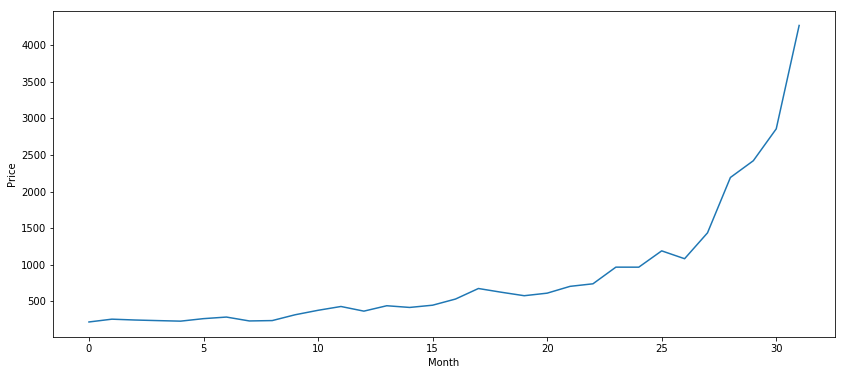

In [3]:
#Plotting the series

plt.figure(figsize=(14, 6))

df1.iloc[:,1].plot()

plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

After this, you need to check whether there is any 'trend', 'seasonality' or 'cyclicity' in the data. It looks like the series follows an increasing exponential distribution. Hence, you should try to fit an exponential function to the series. One way to simplify it is to fit a model that predicts the log price on a monthly basis.

You will require another library to build a model in Python - **statmodels**. This library is widely used for the estimating statistical models and perform various statistical tests on the data available. 

In [4]:
#Creating a logarithmic model fitting over the bitcoin dataset
import statsmodels.api as sm

# Creating variables 'x' and 'y' for model estimation
x = df1.iloc[:,0] # First column contains the month number
y = np.log(df1.iloc[:,1]) # Second column has been transformed to generate a linear trend

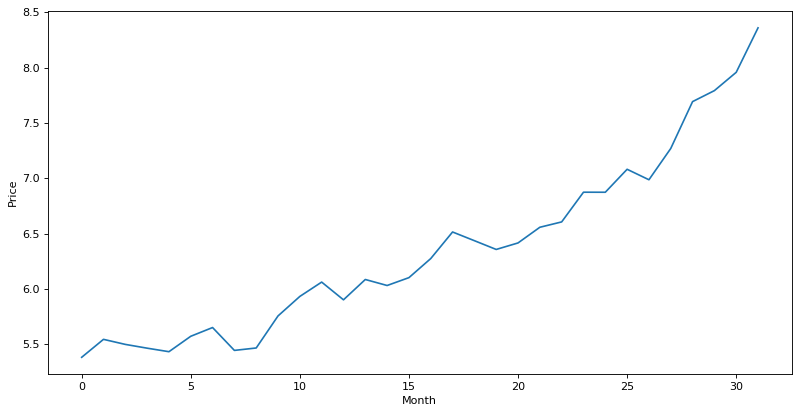

In [5]:
# Plotting the transformed series
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
y.plot()
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

Since, there is a linear upward trend in the plot above, you can use the simple OLS method of linear regression for the estimation of the global trend. Code to impose a linear trend are provided below.

In [6]:
# Add a constant to get an intercept
x_sm = sm.add_constant(x)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y, x_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const     4.987834
Months    0.082865
dtype: float64

The"**lr**" model prepared from the series is **y = 4.988 + 0.083*x**. You can try to visualize both, the time series and the linear trend using the code below. It can be seen that the trend appropriately fits the time series.

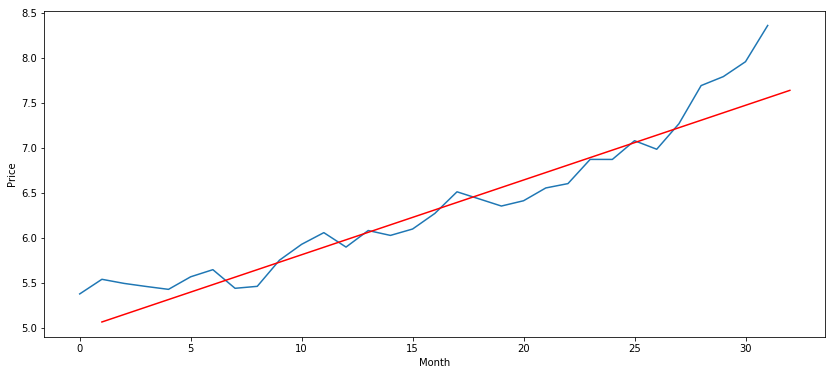

In [7]:
#plotting the series and fitted regression line
plt.figure(figsize=(14, 6))

plt.plot(y)
plt.plot(x, lr.params[0] + lr.params[1] * x, 'r')

plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

The red line here, the one that shows the regression fit, gives the overall pattern of the data. So overall, you expect the average price of bitcoin to go up every year. This gives us the global pattern of the data.

Now, let's plot the series after removing the global pattern.

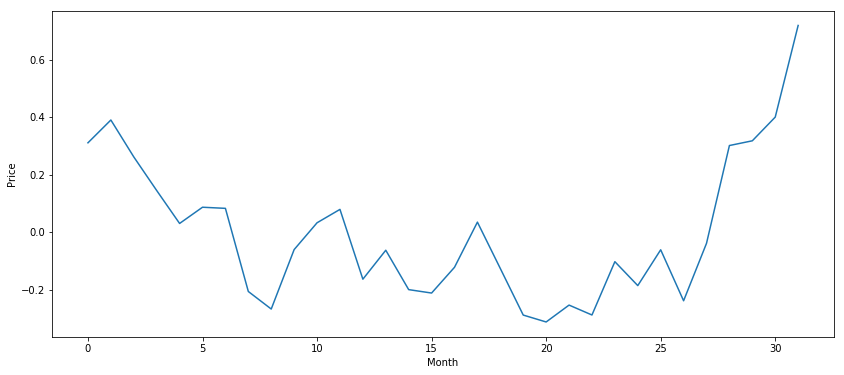

In [8]:
# Storing the predicted values obtained from the linear regression model
globalpred = lr.predict(x_sm)

# plotting the series after removing the global pattern

plt.figure(figsize=(14, 6))

localpred = (y - globalpred)
plt.plot(localpred)

plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

### Question 1
The value of global_pred for June 2017 is approximately equal to ...........

In June 2017, 30 months would have passed since December 2014. So, if you want to find the value of global_pred for June 2017, you should find the 30th element in the vector global_pred. 

Use the command globalpred[29]

In [9]:
round(globalpred[29],1)

7.5

### Question 2
The value of local_pred for June 2017 is approximately equal to ...........

Use the command localpred[29]

In [10]:
round(localpred[29],1)

0.3

One thing that you should be aware of is that the global and local predictions obtained are on a transformed series. Hence, if you want to obtain the predicted value for the bitcoin price in a month, you will have to reverse the transformation. Since we use a logarithmic transformation, it can be reversed by using an exponential transformation.

**exp(log(x)) = x**

Hence, we will obtain the same values as the original series if we implement this transformation.

In [11]:
# Check for the transformation
price_pred = np.exp(globalpred + localpred)
price_pred

0      217.4
1      255.7
2      244.3
3      236.1
4      228.7
5      262.9
6      284.5
7      231.4
8      236.5
9      316.0
10     376.9
11     429.0
12     365.5
13     439.2
14     416.0
15     446.6
16     530.7
17     674.7
18     623.7
19     576.2
20     611.1
21     704.1
22     739.0
23     966.6
24     966.2
25    1189.1
26    1081.7
27    1435.2
28    2191.8
29    2420.7
30    2856.0
31    4268.8
dtype: float64